In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [238]:
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [239]:
print(data.shape)
print(data.dtypes)

(1190, 12)
age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


We want to one-hot-encode all of the nominal categorical variables because there is no mathematical relation between the numbers. This prevents our models from misinterpreting the data

In [240]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['chest pain type', 'resting ecg', 'ST slope'])
one_hot_encoded_data.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,True,False,False,False,True,False,False
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,True,False,False,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,True,False,False,True,False,False
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,True,False,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,True,False,False,False,True,False,False


In [241]:
# split for convenience in next step (scaling)
df = one_hot_encoded_data.drop(columns = ['target'])
target = one_hot_encoded_data['target']

Because we are working with a lot of numerical data as well, we should scale the data using StandardScaler() in order to make sure differences in one variable are not accounted for on a different scale than differences in another variable

In [242]:
# Identify numerical columns and one-hot encoded columns
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
one_hot_columns = [col for col in df.columns if col not in numerical_columns]

# Apply StandardScaler only to numerical columns
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df[numerical_columns])

# Convert the scaled numerical features back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_columns)

# Concatenate the scaled numerical columns with the one-hot encoded columns
scaled_features_df = pd.concat([scaled_numerical_df, df[one_hot_columns]], axis=1)

# Add the target column back to the DataFrame
scaled_features_df['target'] = target.reset_index(drop=True)

# Display the first few rows of the scaled dataset
scaled_features_df.head()

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex,fasting blood sugar,exercise angina,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_0,ST slope_1,ST slope_2,ST slope_3,target
0,-1.466728,0.427328,0.775674,1.265039,-0.849792,1,0,0,False,True,False,False,True,False,False,False,True,False,False,0
1,-0.504600,1.516587,-0.299512,0.637758,0.071119,0,0,0,False,False,True,False,True,False,False,False,False,True,False,1
2,-1.787437,-0.117301,0.716489,-1.636136,-0.849792,1,0,0,False,True,False,False,False,True,False,False,True,False,False,0
3,-0.611503,0.318402,0.035867,-1.244085,0.531575,0,0,1,False,False,False,True,True,False,False,False,False,True,False,1
4,0.029915,0.971958,-0.151550,-0.695214,-0.849792,1,0,0,False,False,True,False,True,False,False,False,True,False,False,0


Let's check the means and make sure that the values are centered around 0 (I rounded because I don't want to see very small numbers with e-17...)

In [243]:
round(scaled_features_df.mean(), 2)

age                   -0.00
resting bp s           0.00
cholesterol            0.00
max heart rate        -0.00
oldpeak                0.00
sex                    0.76
fasting blood sugar    0.21
exercise angina        0.39
chest pain type_1      0.06
chest pain type_2      0.18
chest pain type_3      0.24
chest pain type_4      0.53
resting ecg_0          0.57
resting ecg_1          0.15
resting ecg_2          0.27
ST slope_0             0.00
ST slope_1             0.44
ST slope_2             0.49
ST slope_3             0.07
target                 0.53
dtype: float64

## Exporatory Data Analysis

First, we check the histograms of all of the data so we can get a good idea of what the distribution looks like. This is important to see if we have an imbalanced dataset. Additionally, it lets us see if there are any outliers.

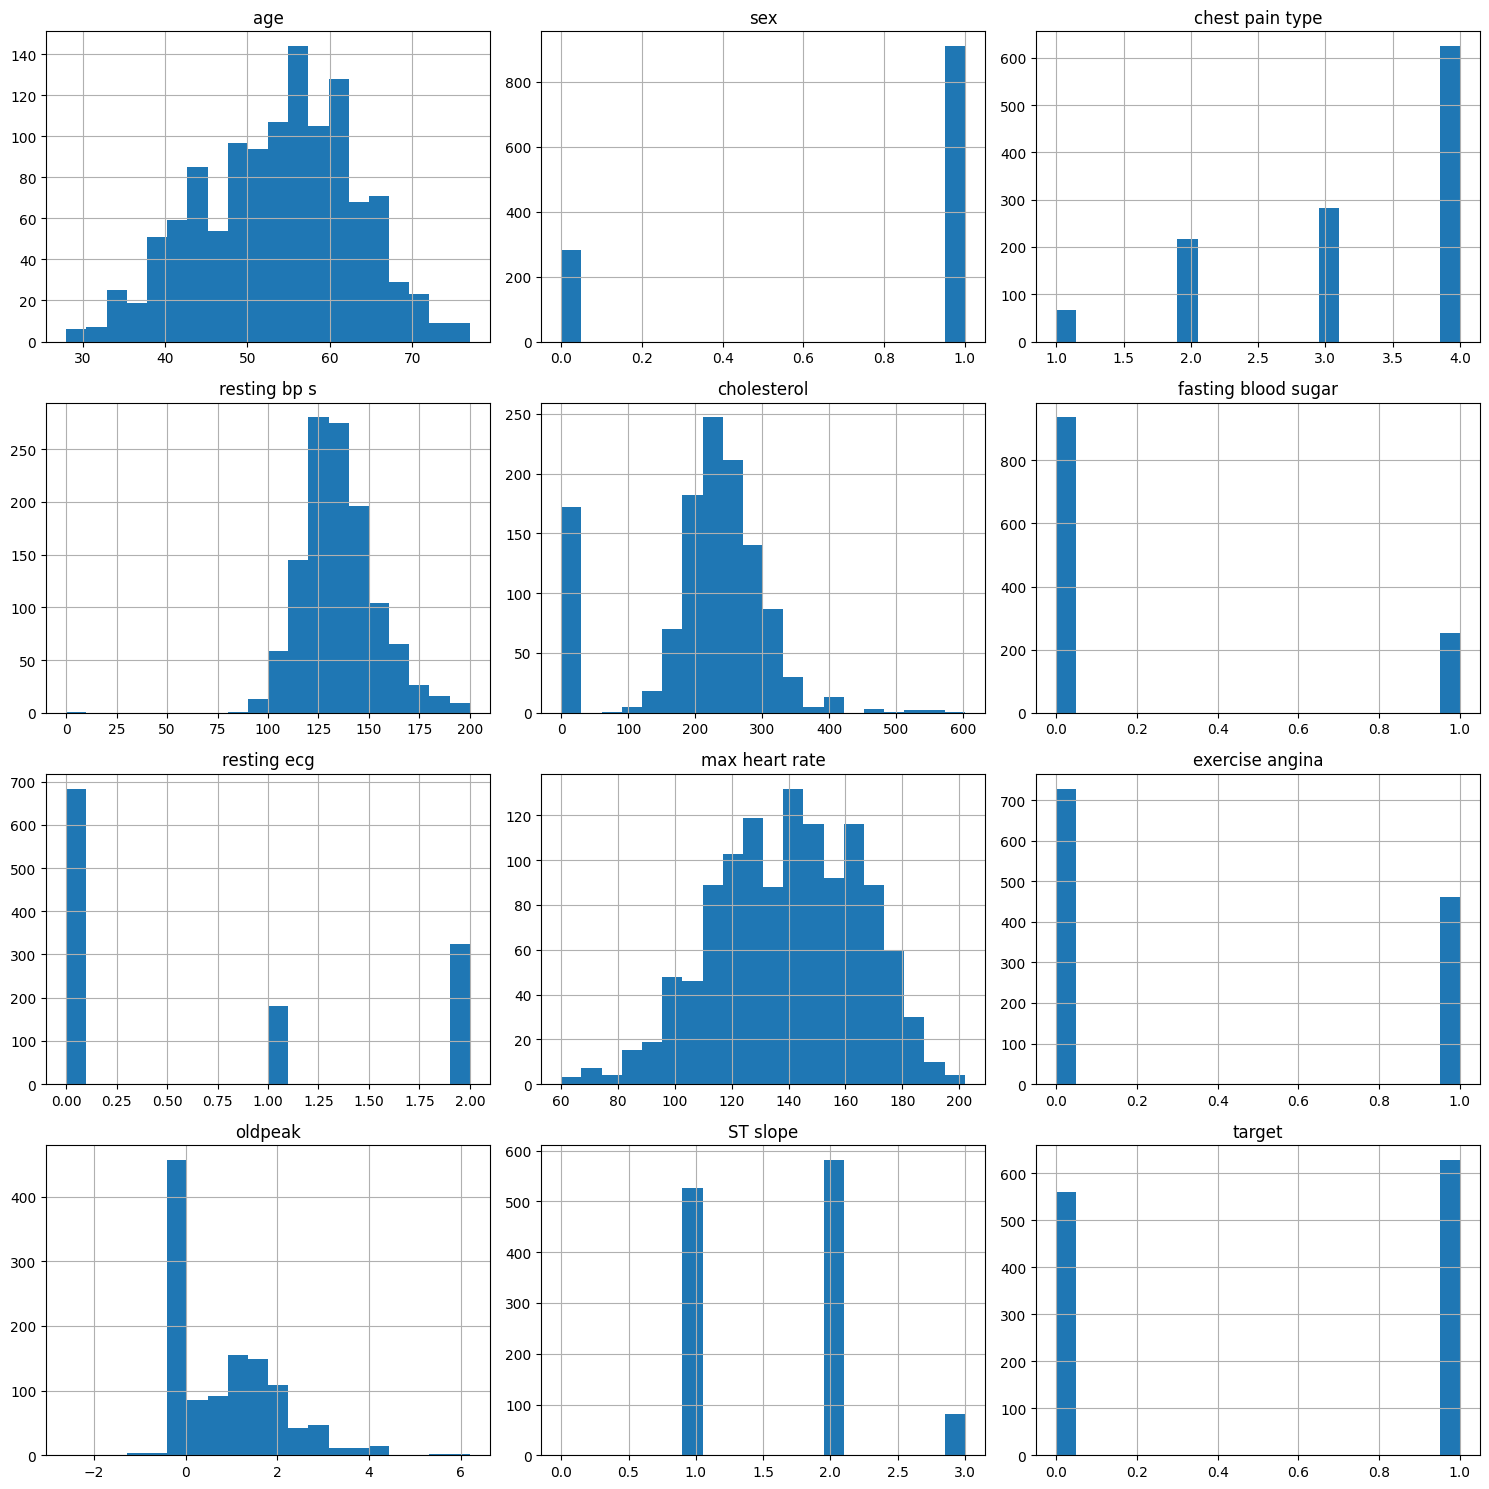

In [244]:
# Plot histograms for all columns for non-modified data so we can see the actual values
data.hist(bins=20, figsize=(15, 15))
plt.tight_layout()
plt.show()

We can see that our data is balanced. In addition, there are no/an insufficient amount of outliers in the data.
Next, we should compare the distributions of the variables between target 0 and target 1 observations

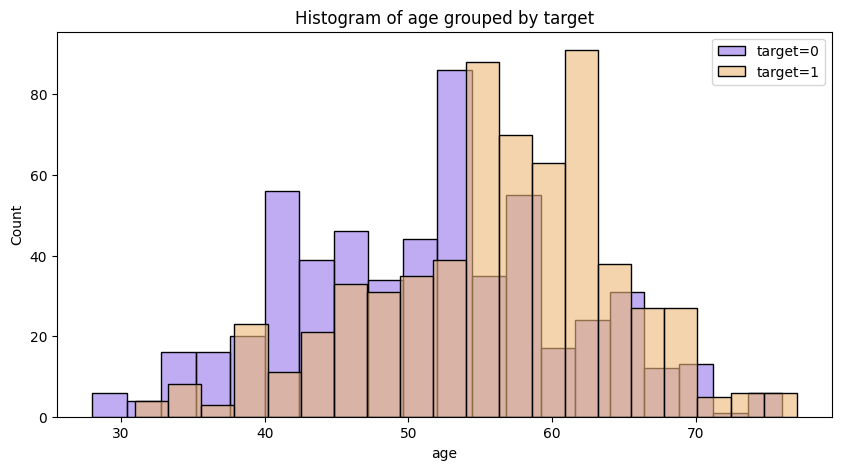

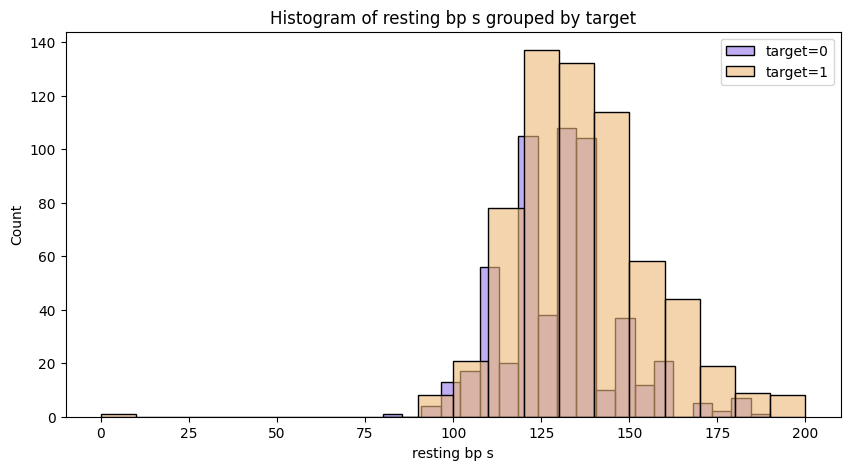

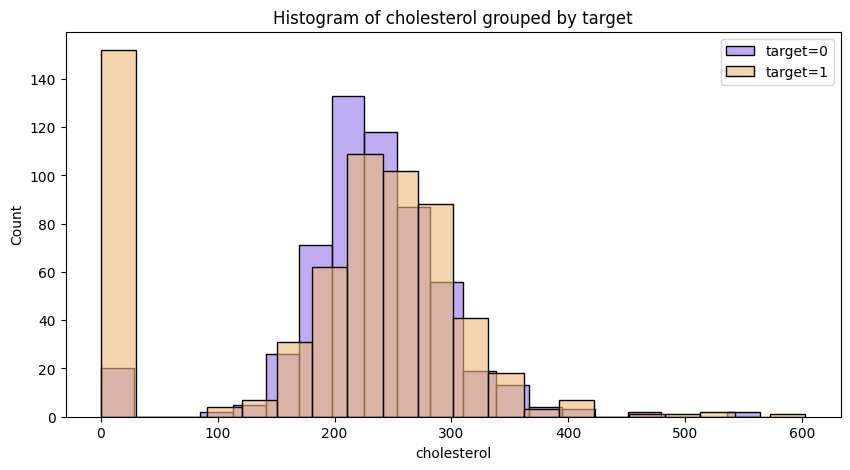

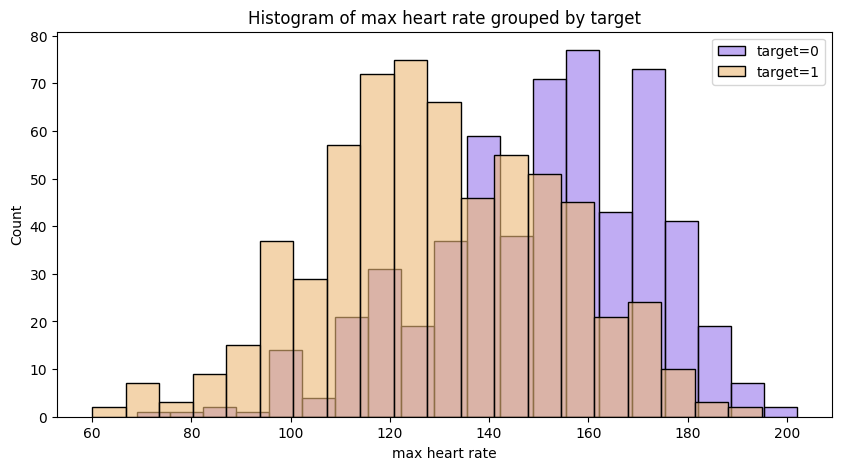

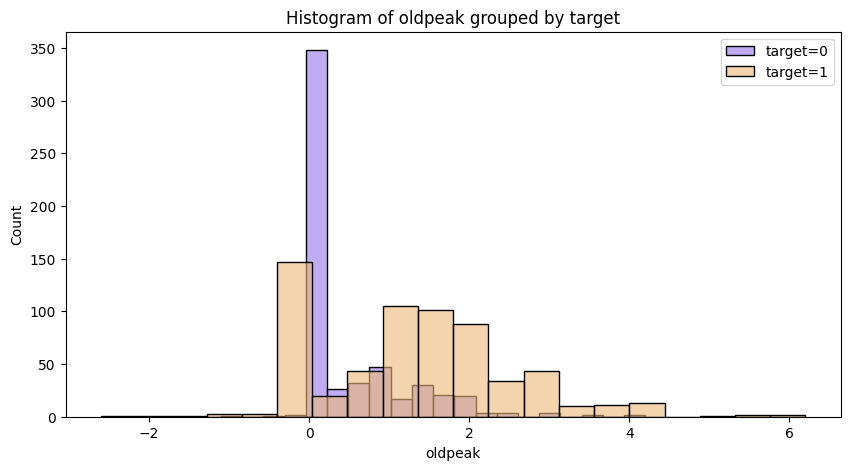

In [245]:
# Plot histograms for numerical columns grouped by target using the original data
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Create histograms for each numerical column, separated by target values
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    for target_value, color in zip([0, 1], ['#9775EC', '#ECB875']):
        subset = data[data['target'] == target_value]
        sns.histplot(subset[column], kde=False, bins=20, label=f"target={target_value}", alpha=0.6, color = color)
    plt.title(f"Histogram of {column} grouped by target")
    plt.legend()
    plt.show()

We can see in the numerical data that there is a small difference in distributions for the age and sex variables. We can also see a significant difference in the max heart rate and oldpeak distributions.

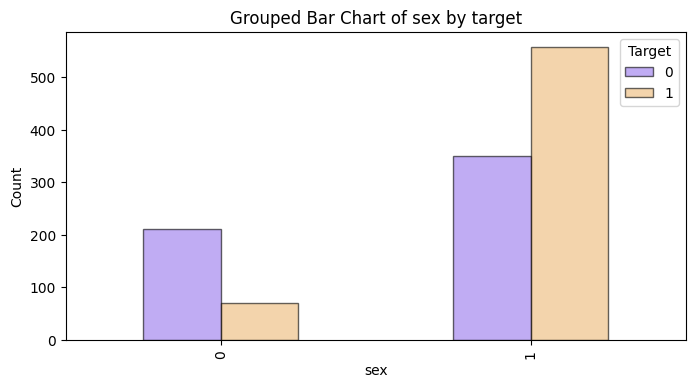

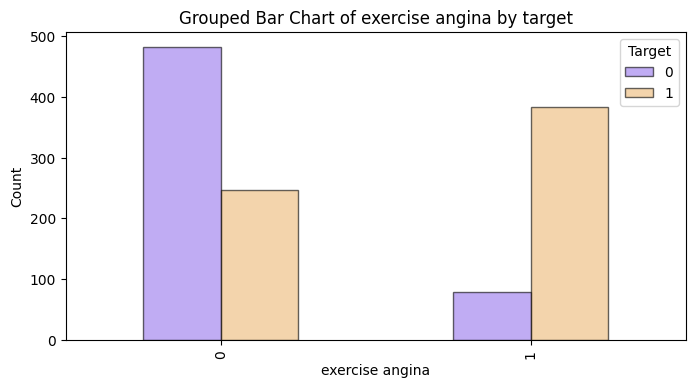

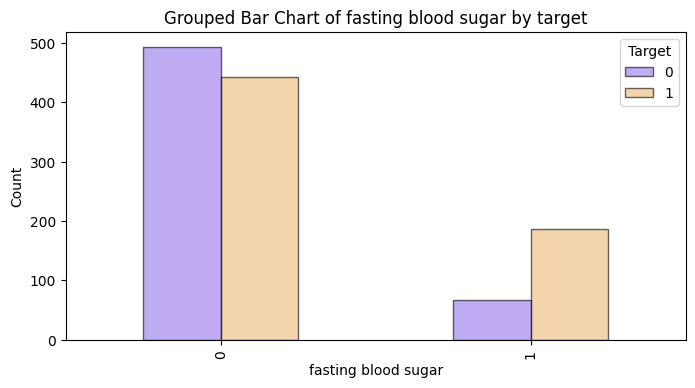

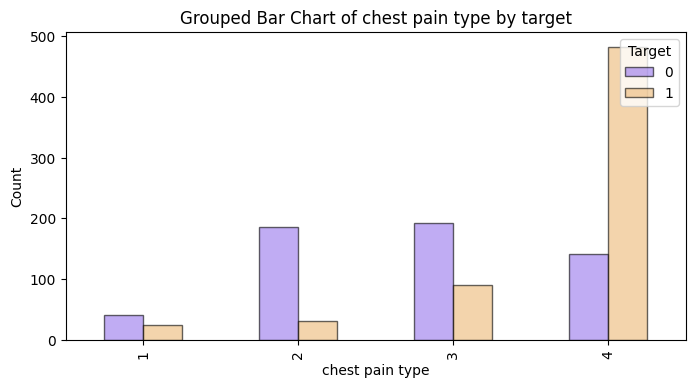

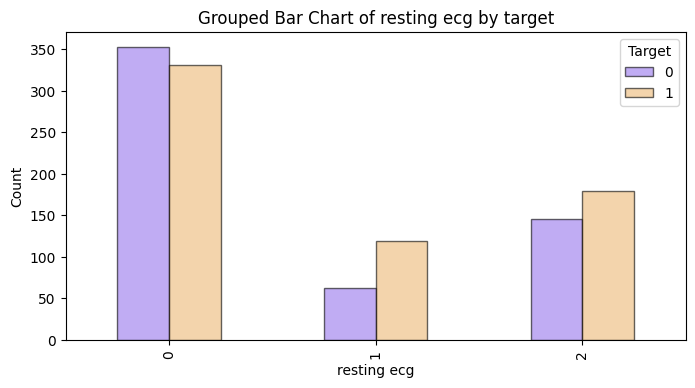

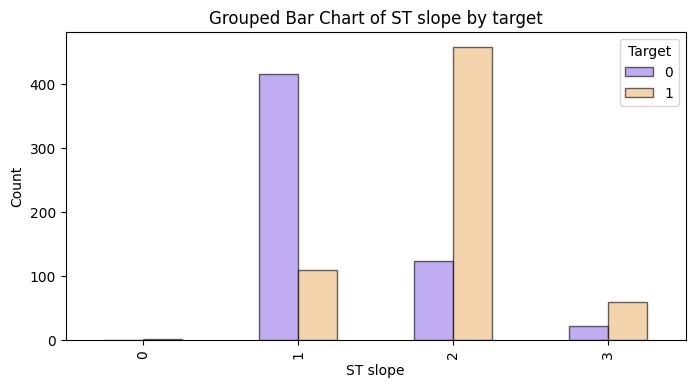

In [246]:
# Plot grouped bar charts for categorical columns grouped by target using hex codes for colors

# Identify categorical columns
categorical_columns = ['sex', 'exercise angina', 'fasting blood sugar', 'chest pain type', 
                       'resting ecg', 'ST slope']

# Define colors for target values
colors = {0: '#9775EC', 1: '#ECB875'}

# Create grouped bar charts for each categorical column, separated by target values
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    counts = data.groupby([column, 'target']).size().unstack().fillna(0)
    counts.plot(kind='bar', stacked=False, color=[colors[0], colors[1]],
                ax=plt.gca(), edgecolor = 'black', alpha = 0.6)
    plt.title(f"Grouped Bar Chart of {column} by target")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title='Target', loc='upper right')
    plt.show()

We can see notable differences in the grouped bar chart distributions for all variables excluding resting ecg.

In [247]:
# now that we're done with comparing distributions, let's remove target from the dataset
scaled_features_df = scaled_features_df.drop(columns = ['target'])
for col in scaled_features_df.columns:
  if scaled_features_df[col].dtype == 'bool':
    scaled_features_df[col] = scaled_features_df[col].astype('int')

# split data for testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target,
                                                    random_state = 123, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(952, 19)
(952,)
(238, 19)
(238,)


In [248]:
# Import libraries for applying models.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.svm import SVC

## Logistic Regression

We'll now apply logistic regression to our data set and assess how well it classifies whether an individual has heart disease.

In [249]:
# Initialize Logistic Regression model.
lr_model = LogisticRegression(random_state = 123)

# Set up parameter grid.
lr_param = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Set up grid search w/ 5-fold cross validation.
lr_grid_search = GridSearchCV(lr_model, lr_param, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Train model.
lr_grid_search.fit(X_train, y_train)

# Print best parameters and cv score.
print("Best parameters for Logistic Regression: ", lr_grid_search.best_params_)
print("Best cross-validation score: ", lr_grid_search.best_score_)

# Create and train best model using best params.
best_lr = lr_grid_search.best_estimator_
best_lr.fit(X_train, y_train)

# Make predictions.
lr_y_pred = best_lr.predict(X_test)

Best parameters for Logistic Regression:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score:  0.846668503720033


In [250]:
# Evaluate model.

print("Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred), "\n")
print("Classification Report:\n", classification_report(y_test, lr_y_pred))
print("Accuracy: ", accuracy_score(y_test, lr_y_pred))
print("Precision: ", precision_score(y_test, lr_y_pred))
print("Recall: ", recall_score(y_test, lr_y_pred))
print("F1-Score: ", f1_score(y_test, lr_y_pred))

Confusion Matrix:
 [[ 77  16]
 [ 15 130]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83        93
           1       0.89      0.90      0.89       145

    accuracy                           0.87       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.87      0.87      0.87       238

Accuracy:  0.8697478991596639
Precision:  0.8904109589041096
Recall:  0.896551724137931
F1-Score:  0.8934707903780069


Our results suggest that Logistic Regression did well with metrics lying between 86-90% which is better/around the same as Decision Tree (85-87%) and KNN (82-85%). However, it performed worse than Random Forest (93-96%), Neural Networks (90-94%), and SVM (87-92%).

## SVM

Next we'll apply SVM to our data set and assess how well it classifies whether an individual has heart disease.

In [251]:
# Initialize SVM model.
svm_model = SVC(random_state = 123)

# Set up parameter grid.
svm_param = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Set up grid search w/ 5-fold cross validation.
svm_grid_search = GridSearchCV(svm_model, svm_param, cv = 5, n_jobs = -1, scoring = 'accuracy')

# Train model.
svm_grid_search.fit(X_train, y_train)

# Print best parameters and cv score.
print("Best parameters for SVM: ", svm_grid_search.best_params_)
print("Best cross-validation score: ", svm_grid_search.best_score_)

# Create and train best model using best params.
best_svm = svm_grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Make predictions.
svm_y_pred = best_svm.predict(X_test)

Best parameters for SVM:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score:  0.8750124001102233


In [252]:
# Evaluate model.

print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred), "\n")
print("Classification Report:\n", classification_report(y_test, svm_y_pred))
print("Accuracy: ", accuracy_score(y_test, svm_y_pred))
print("Precision: ", precision_score(y_test, svm_y_pred))
print("Recall: ", recall_score(y_test, svm_y_pred))
print("F1-Score: ", f1_score(y_test, svm_y_pred))

Confusion Matrix:
 [[ 76  17]
 [ 12 133]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        93
           1       0.89      0.92      0.90       145

    accuracy                           0.88       238
   macro avg       0.88      0.87      0.87       238
weighted avg       0.88      0.88      0.88       238

Accuracy:  0.8781512605042017
Precision:  0.8866666666666667
Recall:  0.9172413793103448
F1-Score:  0.9016949152542373


Here, we see that SVM performed well with metrics lying between 87-92% which is better/around the same as Decision Tree (85-87%), KNN (82-85%), and Logistic Regression (86-90%). However, it performed worse than Random Forest (93-96%) and Neural Networks (90-94%).